# Bike Ride Sharing Assignment

#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. It has decided to come up with a mindful business plan to be able to accelerate its revenue by trying to understand the demand for shared bikes among the people after this ongoing quarantine situation ends. From the user data gathered by the company, they want to know

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## 1) Reading and Understanding data

In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# removing instant, dteday, holiday, weekday, casual and registered
day.drop(['instant','dteday','holiday','weekday','casual','registered'], axis = 1, inplace = True)
day.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 2) Data visualisation

Visualizing continuous variables

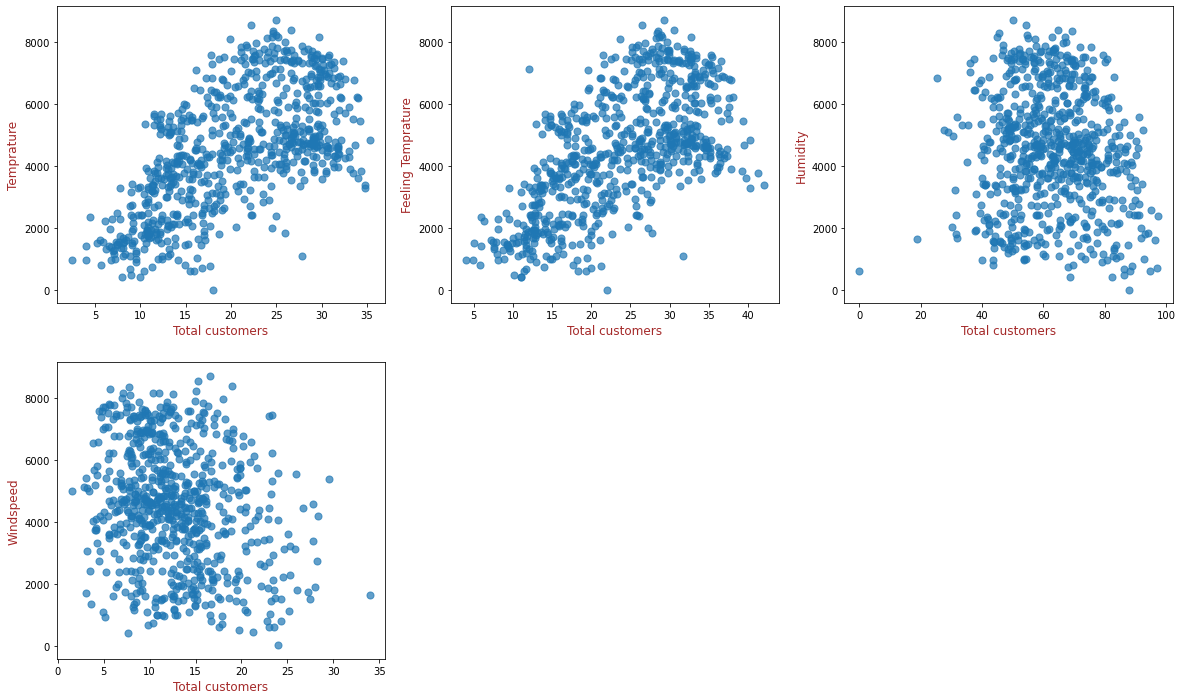

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.scatter(day['temp'], day['cnt'], alpha= 0.7, s = 50)
plt.xlabel("Total customers", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Temprature", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(2,3,2)
plt.scatter(day['atemp'], day['cnt'], alpha= 0.7, s = 50)
plt.xlabel("Total customers", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Feeling Temprature", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(2,3,3)
plt.scatter(day['hum'], day['cnt'], alpha= 0.7, s = 50)
plt.xlabel("Total customers", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Humidity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.subplot(2,3,4)
plt.scatter(day['windspeed'], day['cnt'], alpha= 0.7, s = 50)
plt.xlabel("Total customers", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Windspeed", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Visualising categorical variables

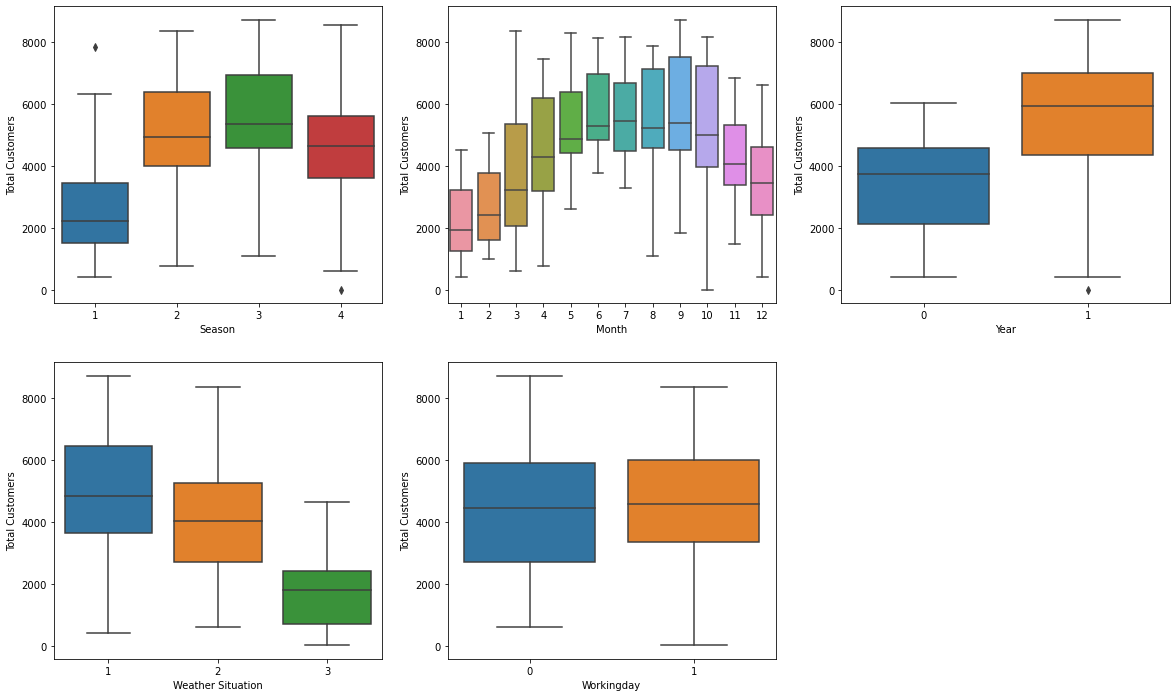

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
bx1 = sns.boxplot(x = 'season', y = 'cnt', data = day)
bx1.set(xlabel='Season', ylabel='Total Customers')
plt.subplot(2,3,2)
bx2 = sns.boxplot(x = 'mnth', y = 'cnt', data = day)
bx2.set(xlabel='Month', ylabel='Total Customers')
plt.subplot(2,3,3)
bx3 = sns.boxplot(x = 'yr', y = 'cnt', data = day)
bx3.set(xlabel='Year', ylabel='Total Customers')
plt.subplot(2,3,4)
bx4 = sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
bx4.set(xlabel='Weather Situation', ylabel='Total Customers')
plt.subplot(2,3,5)
bx5 = sns.boxplot(x = 'workingday', y = 'cnt', data = day)
bx5.set(xlabel='Workingday', ylabel='Total Customers')
plt.show()

## 3) Data Preparation
- Dropping unnecessary data
- Creating dummy variables

In [8]:
day.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Create dummy variables for the features 'season', 'mnth' and 'weathersit'
season_encoding = pd.get_dummies(day['season'], prefix = 'season', drop_first = True)
mnth_encoding = pd.get_dummies(day['mnth'], prefix = 'mnth', drop_first = True)
weathersit_encoding = pd.get_dummies(day['weathersit'], prefix = 'weathersit', drop_first = True)

In [10]:
# Add the dummy variables to the data frame
day = pd.concat([day, season_encoding, mnth_encoding, weathersit_encoding] , axis=1)
day.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop 'season', 'mnth' and 'weathersit' columns as dummy variables have already been added to the data frame
day.drop(['season','mnth','weathersit'], axis = 1, inplace = True)
day.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [13]:
day.corr()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
yr,1.000000e+00,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-1.751358e-17,2.208541e-16,-1.096204e-16,...,7.671648e-17,-2.089634e-16,1.465455e-16,4.139281e-17,-2.138778e-17,8.571788e-17,-2.983215e-17,3.709668e-17,-0.005796,-0.073758
workingday,-2.945396e-03,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,1.509123e-02,1.677487e-02,-4.623058e-03,...,6.541813e-03,2.130094e-02,-1.458882e-02,3.823776e-02,-1.087082e-02,-4.023504e-03,-1.087082e-02,-1.458882e-02,0.048877,0.028990
temp,4.878919e-02,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,1.548756e-01,6.782830e-01,-2.255900e-01,...,1.651884e-01,3.083139e-01,4.327222e-01,3.546479e-01,1.977294e-01,-1.761584e-02,-2.066901e-01,-2.856645e-01,-0.096297,-0.058461
atemp,4.721519e-02,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,1.631513e-01,6.557572e-01,-2.056343e-01,...,1.704469e-01,3.007681e-01,4.293501e-01,3.309389e-01,1.924774e-01,-4.775183e-03,-1.968773e-01,-2.774839e-01,-0.092933,-0.064937
hum,-1.125471e-01,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-2.870035e-03,2.413415e-02,1.639076e-01,...,1.312731e-01,-1.090477e-01,-6.375685e-02,2.158033e-02,1.831181e-01,1.415566e-01,-5.837193e-03,8.220022e-02,0.490628,0.267592
windspeed,-1.162435e-02,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,9.742067e-02,-1.398857e-01,-1.356120e-01,...,-2.953449e-02,-1.962363e-02,-9.608996e-02,-6.912465e-02,-9.482530e-02,-6.013274e-02,-2.587339e-02,-5.461552e-02,-0.037177,0.117332
cnt,5.697285e-01,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,1.453245e-01,3.459080e-01,6.461909e-02,...,1.325529e-01,1.955684e-01,1.662362e-01,1.821001e-01,1.946635e-01,1.088461e-01,-4.034360e-02,-1.738782e-01,-0.170686,-0.240602
season_2,-1.751358e-17,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000e+00,-3.418943e-01,-3.296500e-01,...,5.248014e-01,2.857575e-01,-1.768562e-01,-1.768562e-01,-1.737204e-01,-1.768562e-01,-1.737204e-01,-1.768562e-01,0.040011,-0.043283
season_3,2.208541e-16,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-3.418943e-01,1.000000e+00,-3.344412e-01,...,-1.794266e-01,5.187361e-02,5.172832e-01,5.172832e-01,3.256163e-01,-1.794266e-01,-1.762453e-01,-1.794266e-01,-0.101756,-0.026393
season_4,-1.096204e-16,-0.004623,-0.225590,-0.205634,0.163908,-0.135612,0.064619,-3.296500e-01,-3.344412e-01,1.000000e+00,...,-1.730008e-01,-1.699334e-01,-1.730008e-01,-1.730008e-01,1.591136e-02,5.364968e-01,5.269844e-01,2.847396e-01,0.033857,0.093128


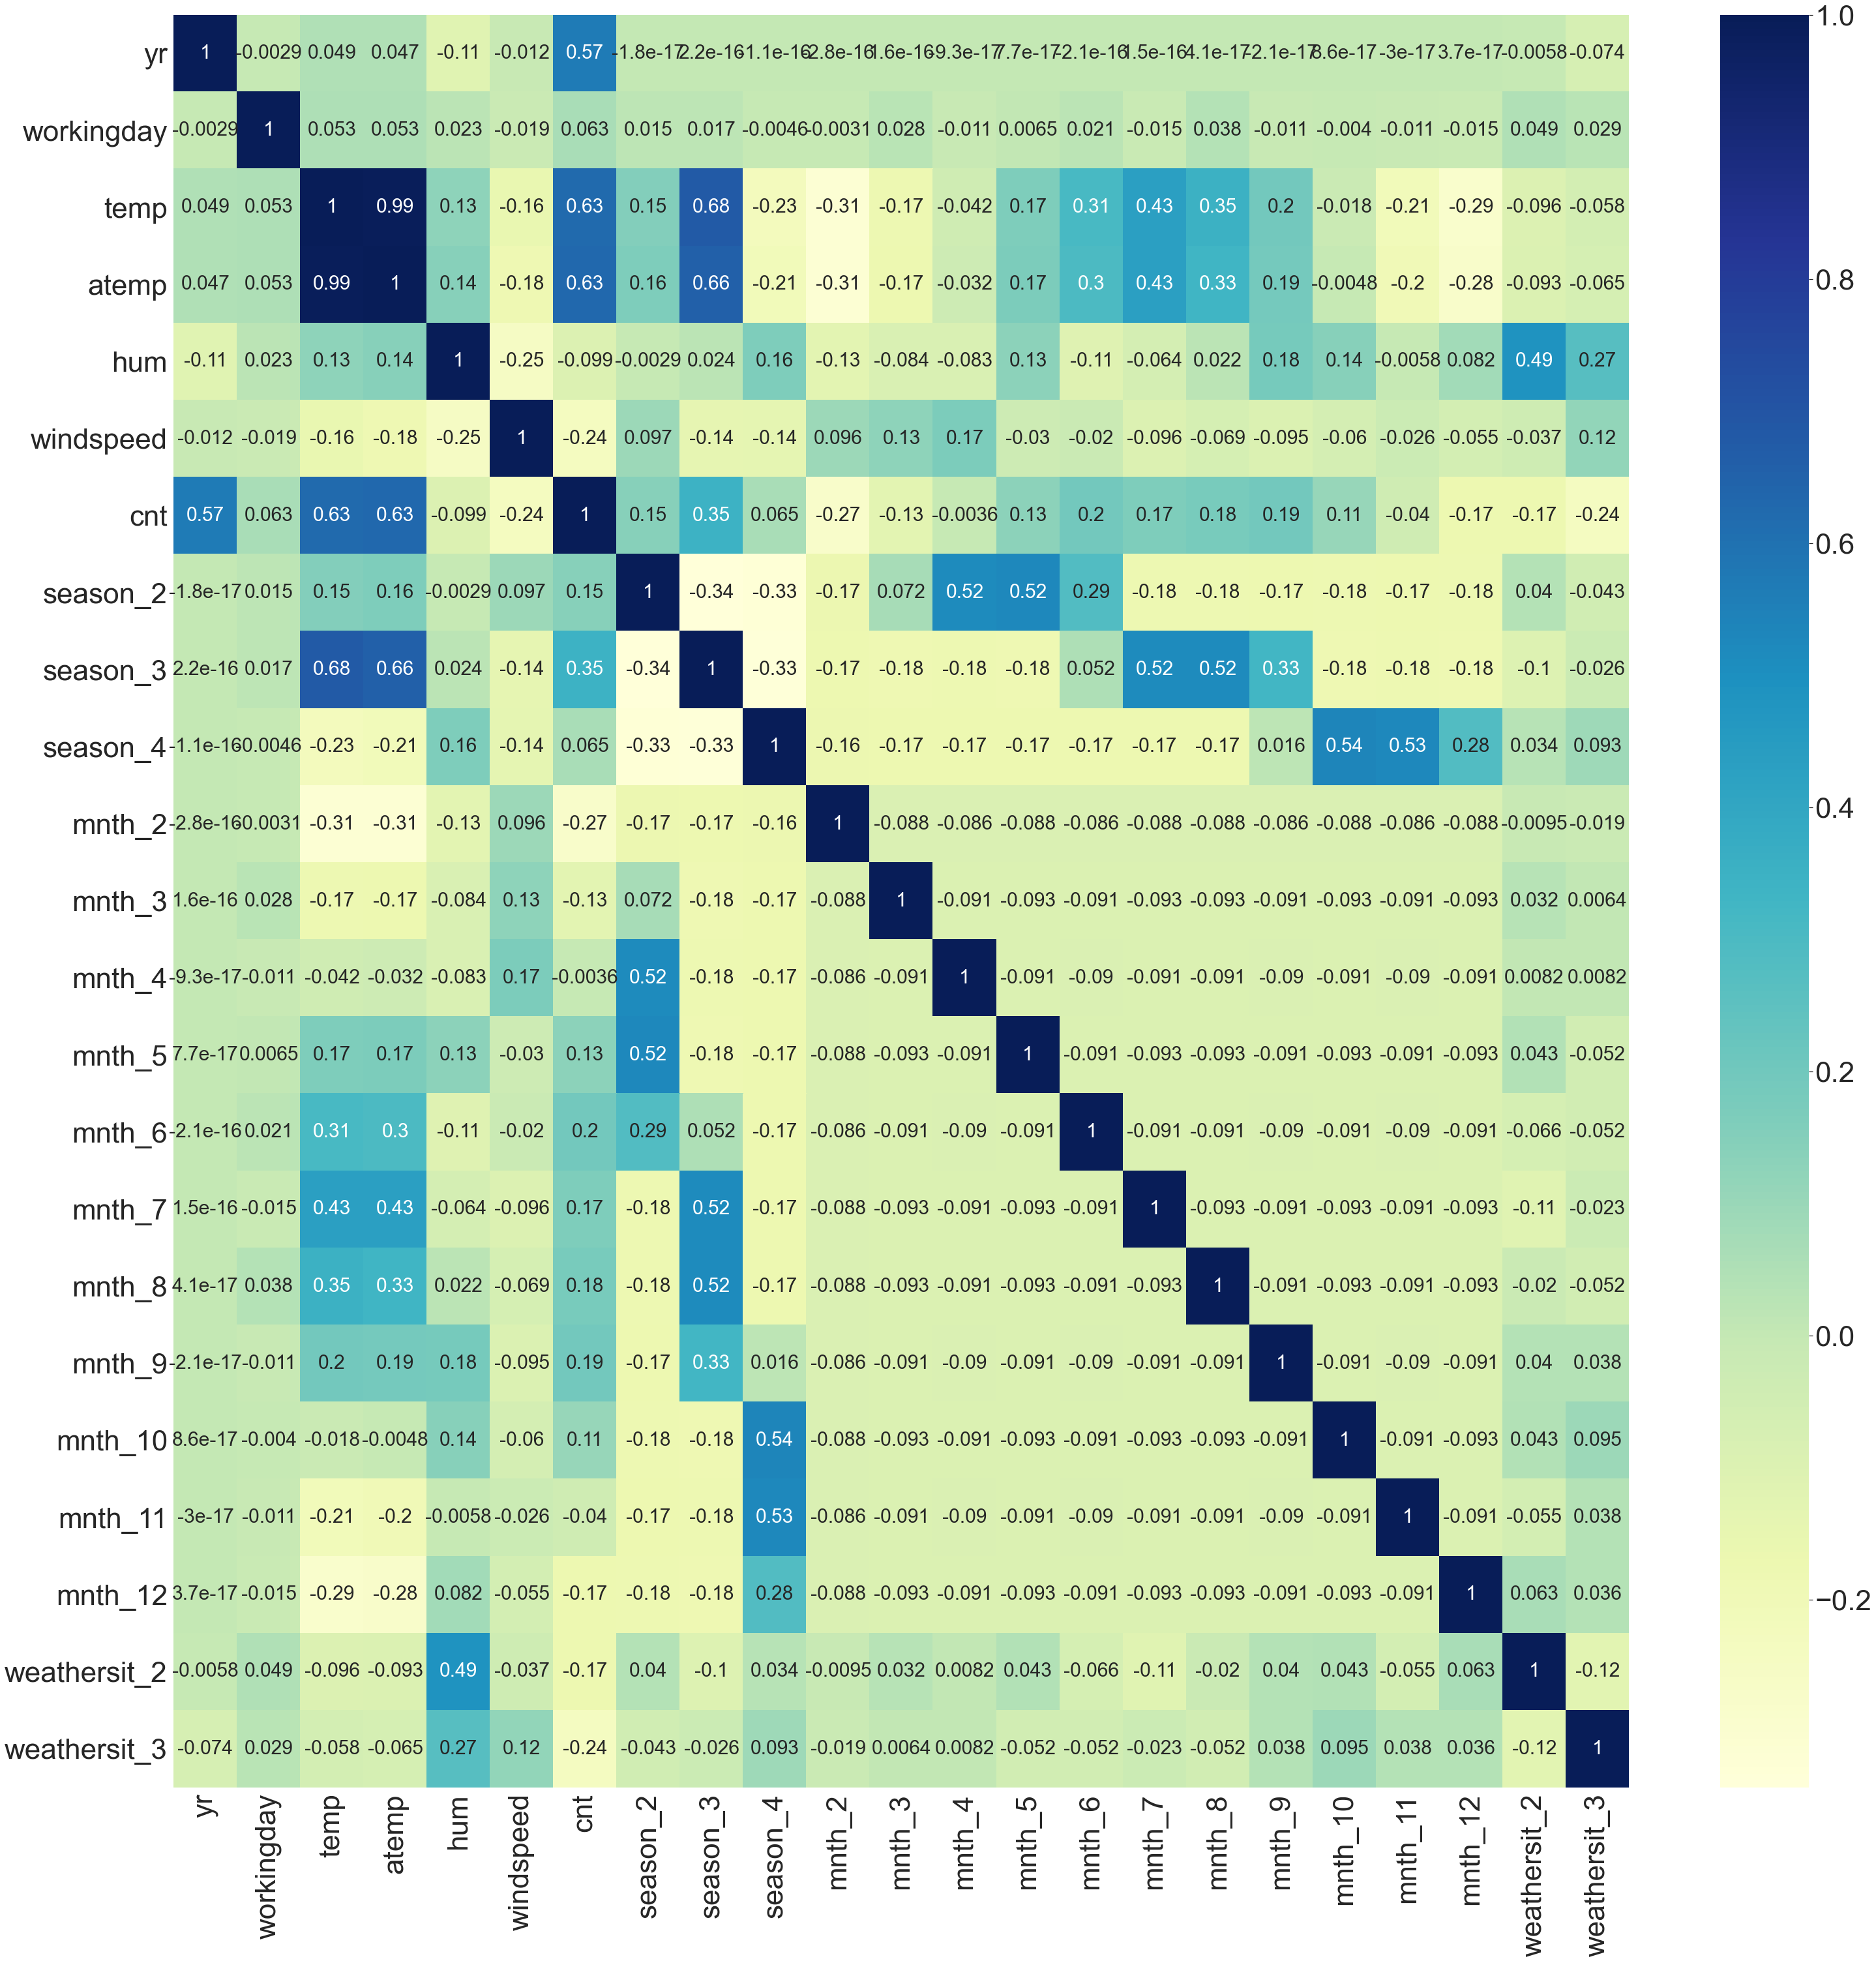

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (50, 50))
sns.set(font_scale=4)
sns.heatmap(day.corr(), annot = True, annot_kws={'size': 30}, cmap="YlGnBu")
plt.show()

## 3) Data preparation

- Splitting data into train-test sets
- Scaling data

In [15]:
# Splitting data into train-test sets
df_train, df_test = train_test_split(day, train_size = 0.75, test_size = 0.25, random_state = 100)

# Applying MinMaxScaler() to all continuous variables
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
311,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,1,...,0,0,0,0,0,0,1,0,0,0
523,1,1,0.735215,0.680985,0.482181,0.286093,0.887483,1,0,0,...,0,1,0,0,0,0,0,0,0,0
381,1,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,0,...,0,0,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.362754,0.550880,0.319514,0.494248,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 4) Building Linear Model

### Building Model using RFE
Building model with the help of Recursive Feature Elimination to identify most important features

In [16]:
# Split into X and y
y_train = df_train.pop('cnt')
X_train = df_train

# Fitting linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 14
rfe = RFE(lm, 14)             
rfe = rfe.fit(X_train, y_train)

# Listing down important features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

### Building Model manually

Using statsmodel to build the model and analyze the statistics

#### Model 1 
Using yr, temp, atemp, hum, windspeed, season_2, season_3, season_4, mnth_3, mnth_8, mnth_9, mnth_10, weathersit_2 and  weathersit_3 as model features

In [17]:
# Setting X_train and y_train
X_train = day[['yr','temp','atemp','hum','windspeed','season_2','season_3','season_4','mnth_3','mnth_8','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_train = day['cnt']

# Add constant
X_train_sm = sm.add_constant(X_train)

# Create a fitted model
lr_1 = sm.OLS(y_train, X_train_sm).fit()

# Check summary statistics
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     261.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.04e-269
Time:                        19:57:20   Log-Likelihood:                -5899.6
No. Observations:                 730   AIC:                         1.183e+04
Df Residuals:                     715   BIC:                         1.190e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1792.0927    223.444      8.020   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [18]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,608.02
1,temp,579.56
3,hum,20.30
6,season_3,7.78
4,windspeed,5.28
5,season_2,3.61
7,season_4,3.07
12,weathersit_2,2.20
0,yr,1.98
9,mnth_8,1.71


Dropping "atemp" feature as it's p-value is high

#### Model 2
Using yr, temp, hum, windspeed, season_2, season_3, season_4, mnth_3, mnth_8, mnth_9, mnth_10, weathersit_2 and  weathersit_3 as model features

In [19]:
# Setting X_train and y_train
X_train = day[['yr','temp','hum','windspeed','season_2','season_3','season_4','mnth_3','mnth_8','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_train = day['cnt']

# Add constant
X_train_sm = sm.add_constant(X_train)

# Create a fitted model
lr_2 = sm.OLS(y_train, X_train_sm).fit()

# Check summary statistics
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     281.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.01e-270
Time:                        19:57:40   Log-Likelihood:                -5900.2
No. Observations:                 730   AIC:                         1.183e+04
Df Residuals:                     716   BIC:                         1.189e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1844.0191    217.521      8.477   

In [20]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,27.62
2,hum,17.97
5,season_3,7.77
3,windspeed,5.27
4,season_2,3.61
6,season_4,3.05
11,weathersit_2,2.17
0,yr,1.98
8,mnth_8,1.68
10,mnth_10,1.63


Dropping "temp" column as it's VIF is quite high

##### Model 3
Using yr, hum, windspeed, season_2, season_3, season_4, mnth_3, mnth_8, mnth_9, mnth_10, weathersit_2 and  weathersit_3 as model features

In [21]:
# Setting X_train and y_train
X_train = day[['yr','hum','windspeed','season_2','season_3','season_4','mnth_3','mnth_8','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_train = day['cnt']

# Add constant
X_sm = sm.add_constant(X_train)

# Create a fitted model
lr_3 = sm.OLS(y_train, X_sm).fit()

# Check summary statistics
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     204.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.36e-222
Time:                        19:58:03   Log-Likelihood:                -6017.5
No. Observations:                 730   AIC:                         1.206e+04
Df Residuals:                     717   BIC:                         1.212e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2820.8304    245.610     11.485   

In [22]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,11.01
2,windspeed,5.05
4,season_3,3.24
5,season_4,2.81
3,season_2,2.07
10,weathersit_2,2.00
0,yr,1.92
7,mnth_8,1.68
9,mnth_10,1.57
8,mnth_9,1.44


Dropping "hum" as it's VIF is high

#### Model 4
Using yr, windspeed, season_2, season_3, season_4, mnth_3, mnth_8, mnth_9, mnth_10, weathersit_2 and  weathersit_3 as model features

In [23]:
# Setting X_train and y
X_train = day[['yr','windspeed','season_2','season_3','season_4','mnth_3','mnth_8','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_train = day['cnt']

# Add constant
X_train_sm = sm.add_constant(X_train)

# Create a fitted model
lr_4 = sm.OLS(y_train, X_train_sm).fit()

# Check summary statistics
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     221.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.85e-222
Time:                        19:58:28   Log-Likelihood:                -6019.8
No. Observations:                 730   AIC:                         1.206e+04
Df Residuals:                     718   BIC:                         1.212e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2374.4608    131.719     18.027   

In [24]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.37
3,season_3,2.61
4,season_4,2.18
0,yr,1.87
2,season_2,1.68
6,mnth_8,1.68
8,mnth_10,1.57
9,weathersit_2,1.49
7,mnth_9,1.43
5,mnth_3,1.19


Dropping "mnth_8" also as it's p-value is 0.058 which is high

#### Model 5
Using yr, windspeed, season_2, season_3, season_4, mnth_3, mnth_9, mnth_10, weathersit_2 and  weathersit_3 as model features

In [25]:
# Setting X_train and y_train
X_train = day[['yr','windspeed','season_2','season_3','season_4','mnth_3','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_train = day['cnt']

# Add constant
X_train_sm = sm.add_constant(X_train)

# Create a fitted model
lr_5 = sm.OLS(y_train, X_train_sm).fit()

# Check summary statistics
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.07e-222
Time:                        19:58:47   Log-Likelihood:                -6021.7
No. Observations:                 730   AIC:                         1.207e+04
Df Residuals:                     719   BIC:                         1.212e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2370.9567    131.944     17.969   

In [26]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.37
4,season_4,2.17
0,yr,1.87
3,season_3,1.80
2,season_2,1.68
7,mnth_10,1.57
8,weathersit_2,1.48
6,mnth_9,1.28
5,mnth_3,1.19
9,weathersit_3,1.09


Now that p-values and the VIF of all the features are good, we can go ahead and perform residual analysis of the final model

## 5) Residual Analysis

In [27]:
y_train_pred = lr_5.predict(X_train_sm)

In [28]:
res = y_train - y_train_pred

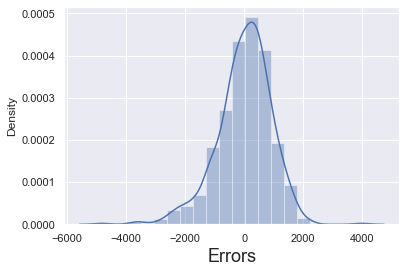

In [29]:
fig = plt.figure()
sns.set(font_scale=1)
sns.distplot(res, bins = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Since the error terms are normally distributed, we can now go ahead and make predictions using the final model

## 6) Model Evaluation

Applying scaling on the test data set, predicting y with respect to X_test and visualizing the evaluation results

In [30]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,1,0,0,0,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,1,0,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Text(0, 0.5, 'y_pred')

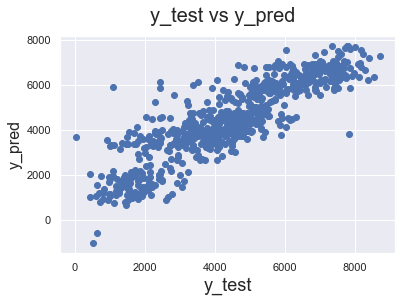

In [31]:
# Setting X_test and y_test
X_test = day[['yr','windspeed','season_2','season_3','season_4','mnth_3','mnth_9','mnth_10','weathersit_2','weathersit_3']]
y_test = day['cnt']

# Add constant
X_test_m5 = sm.add_constant(X_test)

# Making predictions using the final model
y_pred_m5 = lr_5.predict(X_test_m5)

# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [39]:
# finding out Root mean squared error and R-square values

rmse = np.sqrt(mean_squared_error(y_test, y_pred_m5))
r_squared = r2_score(y_test, y_pred_m5)

print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Root_Mean_Squared_Error : 925.1210924004893
r_square_value : 0.7713471779220452


The R-square value on test data is 77.13% which is similar to the R-square value on the training data which is 77.10%. Hence, the final model is generalizing well.